In [ ]:
Jaden Armstrong
Dr. Babak Forouraghi
CSC 346 D01
Project 2

Problem 1: (Excel)
First, I addresses the missing values which was only one (Georgia Assault Statistic). Considering all the techniques at my disposal to address this, I decided on taking the average of all assault values then inserting that into the missing value. This average came out to be 169.938, which I rounded to 170. Other than that, there were no other noisy data I needed to address.


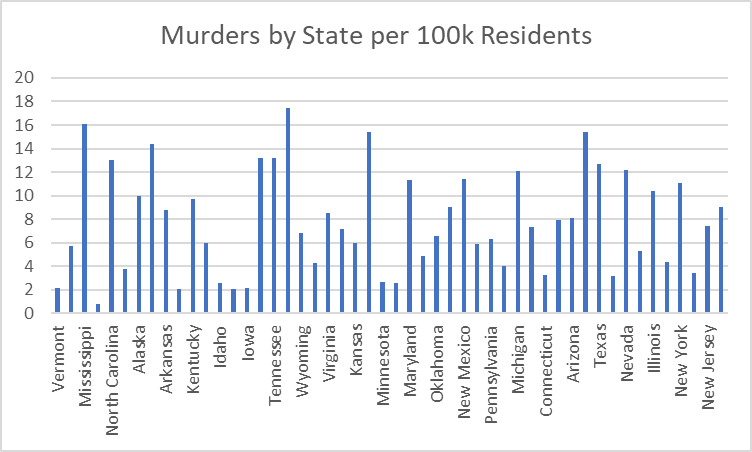

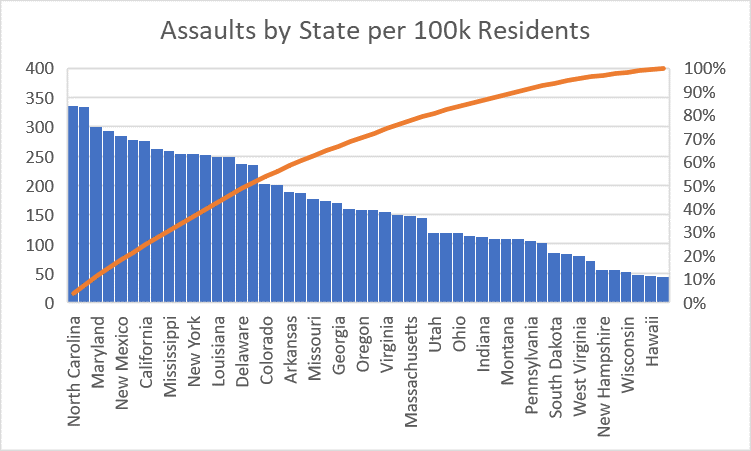

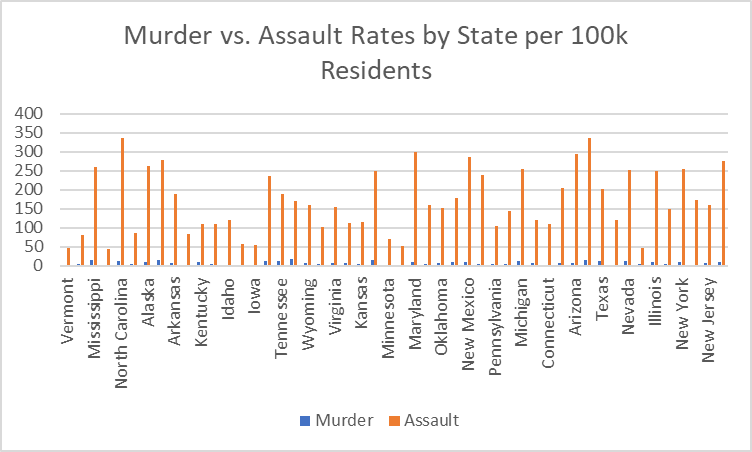

The last step in this portion of the assignment is to organize the states by population size into groups of small, medium, large, and extra-large. I first organized the data into increasing order of population within excel, this made it easy to grab the group of states I need in each category. I then created an average of Assaults using 'AVERAGE' in excel for each group of state size then put this data into a chart, shown below.
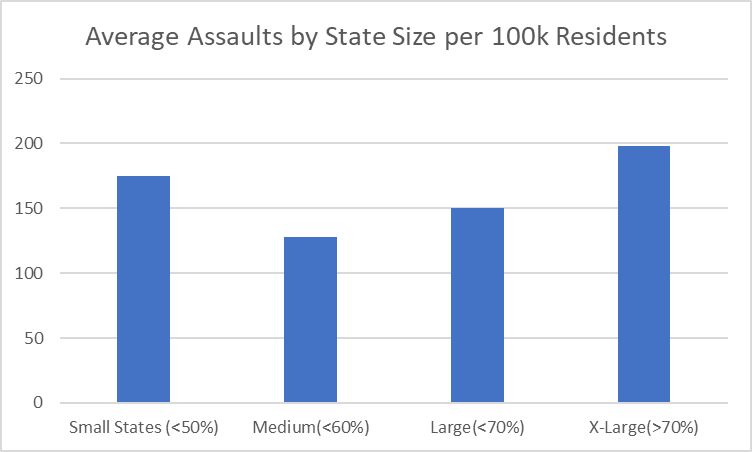

Problem 1: (SQL)

USarrests SQL:
After importing the USarrests csv file into the coverter and then into SQL, the first action peformed on the table of data was to update the Georgia Assault data. This was done using the average of assaults, calculated in excel. The following SQL query was used

In [ ]:
Update USarrests
Set Assault = 170
where State = 'Georgia'

Mean: UPDATE USArrests AS a
SET Assault = (
    SELECT AVG(Assault)
    FROM USArrests AS b
    WHERE a.State <> b.State AND b.Assault IS NOT NULL
)
WHERE State = 'Georgia';


The following Queries were used to find the Min, Max, Mean, and Variance of each numeric group:


In [ ]:
SELECT
    MIN(Murder) AS Min_Murder,
    MAX(Murder) AS Max_Murder,
    AVG(Murder) AS Mean_Murder,
    VARIANCE(Murder) AS Variance_Murder,
    MIN(Assault) AS Min_Assault,
    MAX(Assault) AS Max_Assault,
    AVG(Assault) AS Mean_Assault,
    VARIANCE(Assault) AS Variance_Assault,
    MIN(UrbanPop) AS Min_UrbanPop,
    MAX(UrbanPop) AS Max_UrbanPop,
    AVG(UrbanPop) AS Mean_UrbanPop,
    VARIANCE(UrbanPop) AS Variance_UrbanPop
FROM USArrests;

IndentationError: ignored

The state with the highest rate of murder, Georgia, was queried with the following script.


In [ ]:
Select State, Murder
From USArrests
Where Murder = (Select Max(Murder) from USArrests)

To list states in ascending order of urban population: (It is option to include 'ASC' after UrbanPop since the ordering is ascending by default)

In [ ]:
SELECT State
FROM USArrests
ORDER BY UrbanPop;

To Find the count of states with a higher murder rate than Arizona, as well as list all of those states in an aliased table:

In [ ]:
SELECT COUNT(*) AS HigherMurderCount
FROM USArrests
WHERE Murder > (SELECT Murder FROM USArrests WHERE State = 'Arizona');

SELECT State AS MurderRatesHigherThanAZ
FROM USArrests
WHERE Murder > (SELECT Murder FROM USArrests WHERE State = 'Arizona');

**Problem 2: Excel**
First, to address the missing values in the Child Mortality data set, I used the average function for the values that were there (Using =Average(B2:B28) and the same for the other two categories)

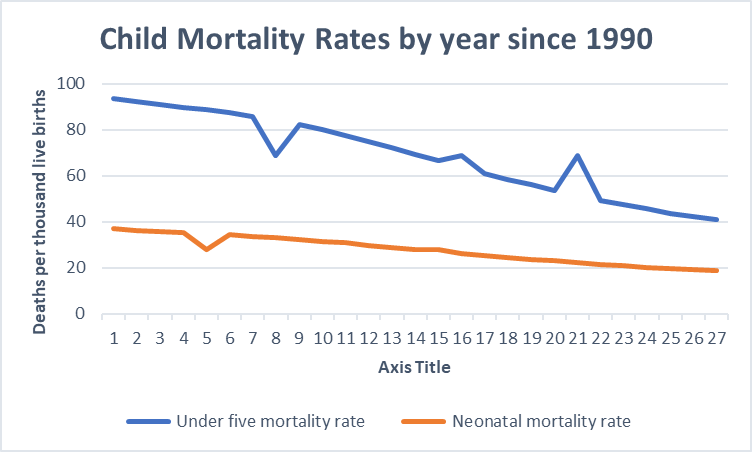

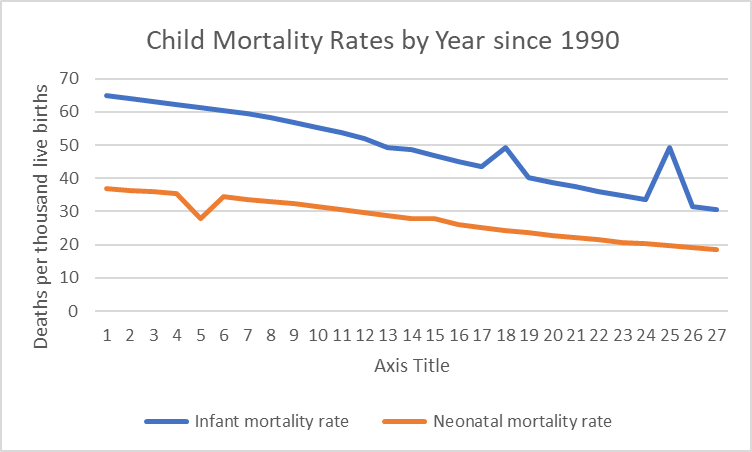


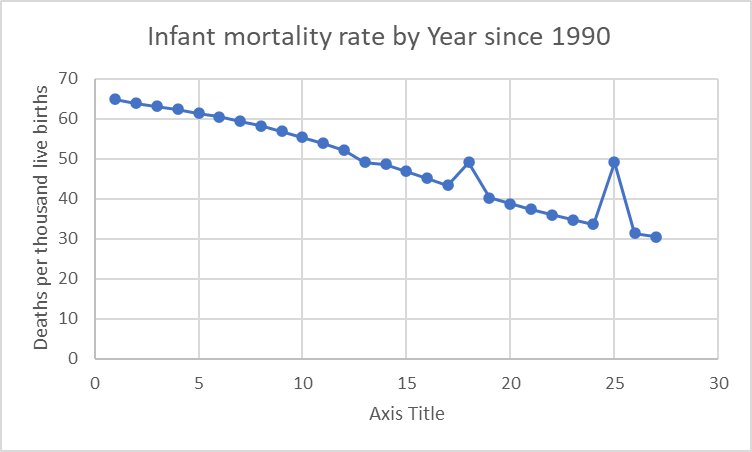

I decied against using a likert scale since the readyabilty of this graph is good enough. It is easy to distingush the progress made over time

Problem 2: Child Mortality Rates by year

In this step, I first opened the text file in excel and use the data into columns (fixed) function to convert the data into a useable csv file. I then used the csv to sql insert converter to create a table of the data in sql. The first thing that needs to be done is to fill in/handle missing values. I used the following query to find the medians of each numeric group.


In [ ]:
SELECT
    ROUND(MEDIAN(CAST(Underve_mortality_rate AS DECIMAL(10,2))), 2) AS Median_Underve,
    ROUND(MEDIAN(CAST(Infant_mortality_rate AS DECIMAL(10,2))), 2) AS Median_Infant,
    ROUND(MEDIAN(CAST(Neonatal_mortality_rate AS DECIMAL(10,2))), 2) AS Median_Neonatal
FROM ChildMortality;

After I have the median values, I used the following script to insert these values into the table

In [ ]:
Update ChildMortality
SET Underve_mortality_rate = 66.7
Where Underve_mortality_rate = 'N/A'

Update ChildMortality
SET Infant_mortality_rate = 46.9
Where Infant_mortality_rate = 'N/A';

Update ChildMortality
SET Neonatal_mortality_rate = 26.1
Where Neonatal_mortality_rate = 'N/A';

The years with the lowest and highest infant mortality rates respectively are, 2016 and 1990 (The query used to find this can be seen in the next code section)
I first used the top code to figure out the average, I then copied that average into the next query to filter what years are shown
---
The years where infant mortality rates are above the average for all infant mortality rates are; 1994, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016

---





In [ ]:
SELECT AVG(Neonatal_mortality_rate) AS Average_Neonatal_Mortality_Rate
FROM ChildMortality
WHERE Neonatal_mortality_rate IS NOT NULL;

SELECT Year
FROM ChildMortality
WHERE Neonatal_mortality_rate < 27.529629;


Next, I organized the infant mortality rates in descending order. For this I used the Select and included the parameters Year and Infant Mortality Rate.

In [ ]:
SELECT Year, Infant_mortality_rate
FROM ChildMortality
ORDER BY Infant_mortality_rate DESC;

To find the min, max, mean, variance, and standard deviation of each mortality rate, I used the query below.

In [ ]:

SELECT
    MIN(Underﬁve_mortality_rate) AS Min_Underﬁve_mortality_rate,
    MIN(Infant_mortality_rate) AS Min_Infant_mortality_rate,
    MIN(Neonatal_mortality_rate) AS Min_Neonatal_mortality_rate
FROM ChildMortality;

SELECT
    MAX(Underﬁve_mortality_rate) AS Max_Underﬁve_mortality_rate,
    MAX(Infant_mortality_rate) AS Max_Infant_mortality_rate,
    MAX(Neonatal_mortality_rate) AS Max_Neonatal_mortality_rate
FROM ChildMortality;


SELECT
    AVG(Underﬁve_mortality_rate) AS Mean_Underﬁve_mortality_rate,
    AVG(Infant_mortality_rate) AS Mean_Infant_mortality_rate,
    AVG(Neonatal_mortality_rate) AS Mean_Neonatal_mortality_rate
FROM ChildMortality;

SELECT
    VARIANCE(Underﬁve_mortality_rate) AS Variance_Underﬁve_mortality_rate,
    VARIANCE(Infant_mortality_rate) AS Variance_Infant_mortality_rate,
    VARIANCE(Neonatal_mortality_rate) AS Variance_Neonatal_mortality_rate
FROM ChildMortality;

SELECT
    SQRT(VARIANCE(Underﬁve_mortality_rate)) AS StdDev_Underﬁve_mortality_rate,
    SQRT(VARIANCE(Infant_mortality_rate)) AS StdDev_Infant_mortality_rate,
    SQRT(VARIANCE(Neonatal_mortality_rate)) AS StdDev_Neonatal_mortality_rate
FROM ChildMortality;

To create a new column called Abovefive_mortality_rate I used the following query:

In [ ]:
ALTER TABLE ChildMortality
ADD COLUMN AboveFive_Mortality_Rate VARCHAR(30);

Display the entire table again:

In [ ]:
Select *
from ChildMortality

Outside Resources used to assist me in this project were:
https://www.w3schools.com/sql/
https://stackoverflow.com/questions/tagged/sql
https://support.microsoft.com/en-au/office/excel-functions-by-category-5f91f4e9-7b42-46d2-9bd1-63f26a86c0eb
